In [46]:
import pandas as pd
import matplotlib.pyplot as plt # 基础绘图库（什么都能画，但可能慢、复杂）
import seaborn as sns # 数据可视化专用库（专门用来快速画数据图）


# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [47]:
def time_deal(df):

    # 转换时间列编码
    df["日期"] = pd.to_datetime(df["日期"])

    # 将时间列设为index
    df.set_index("日期", inplace=True)

    # 按月聚合
    df_finished = df.resample("M").sum()
    
    return df_finished

In [48]:
df1 = pd.read_csv('中间数据集\\多表_按品类\\花菜类.csv')[["日期", "销量(千克)"]]
df1 = time_deal(df1)

C:\Users\jack\AppData\Local\Temp\ipykernel_9500\212365255.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_finished = df.resample("M").sum()


In [49]:
df2 = pd.read_csv('中间数据集\\多表_按品类\\花叶类.csv')[["日期", "销量(千克)"]]
df2 = time_deal(df2)

C:\Users\jack\AppData\Local\Temp\ipykernel_9500\212365255.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_finished = df.resample("M").sum()


In [50]:
df3 = pd.read_csv('中间数据集\\多表_按品类\\茄类.csv')[["日期", "销量(千克)"]]
df3 = time_deal(df3)

C:\Users\jack\AppData\Local\Temp\ipykernel_9500\212365255.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_finished = df.resample("M").sum()


In [51]:
df4 = pd.read_csv('中间数据集\\多表_按品类\\辣椒类.csv')[["日期", "销量(千克)"]]
df4 = time_deal(df4)

C:\Users\jack\AppData\Local\Temp\ipykernel_9500\212365255.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_finished = df.resample("M").sum()


In [52]:
df5 = pd.read_csv('中间数据集\\多表_按品类\\食用菌.csv')[["日期", "销量(千克)"]]
df5 = time_deal(df5)

C:\Users\jack\AppData\Local\Temp\ipykernel_9500\212365255.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_finished = df.resample("M").sum()


In [53]:
df6 = pd.read_csv('中间数据集\\多表_按品类\\水生根茎类.csv')[["日期", "销量(千克)"]]
df6 = time_deal(df6)

C:\Users\jack\AppData\Local\Temp\ipykernel_9500\212365255.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_finished = df.resample("M").sum()


In [54]:
df1.head()

,销量(千克)
日期,
2020-07-31,1522.555
2020-08-31,1748.658
2020-09-30,1336.066
2020-10-31,1644.963
2020-11-30,1943.391


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


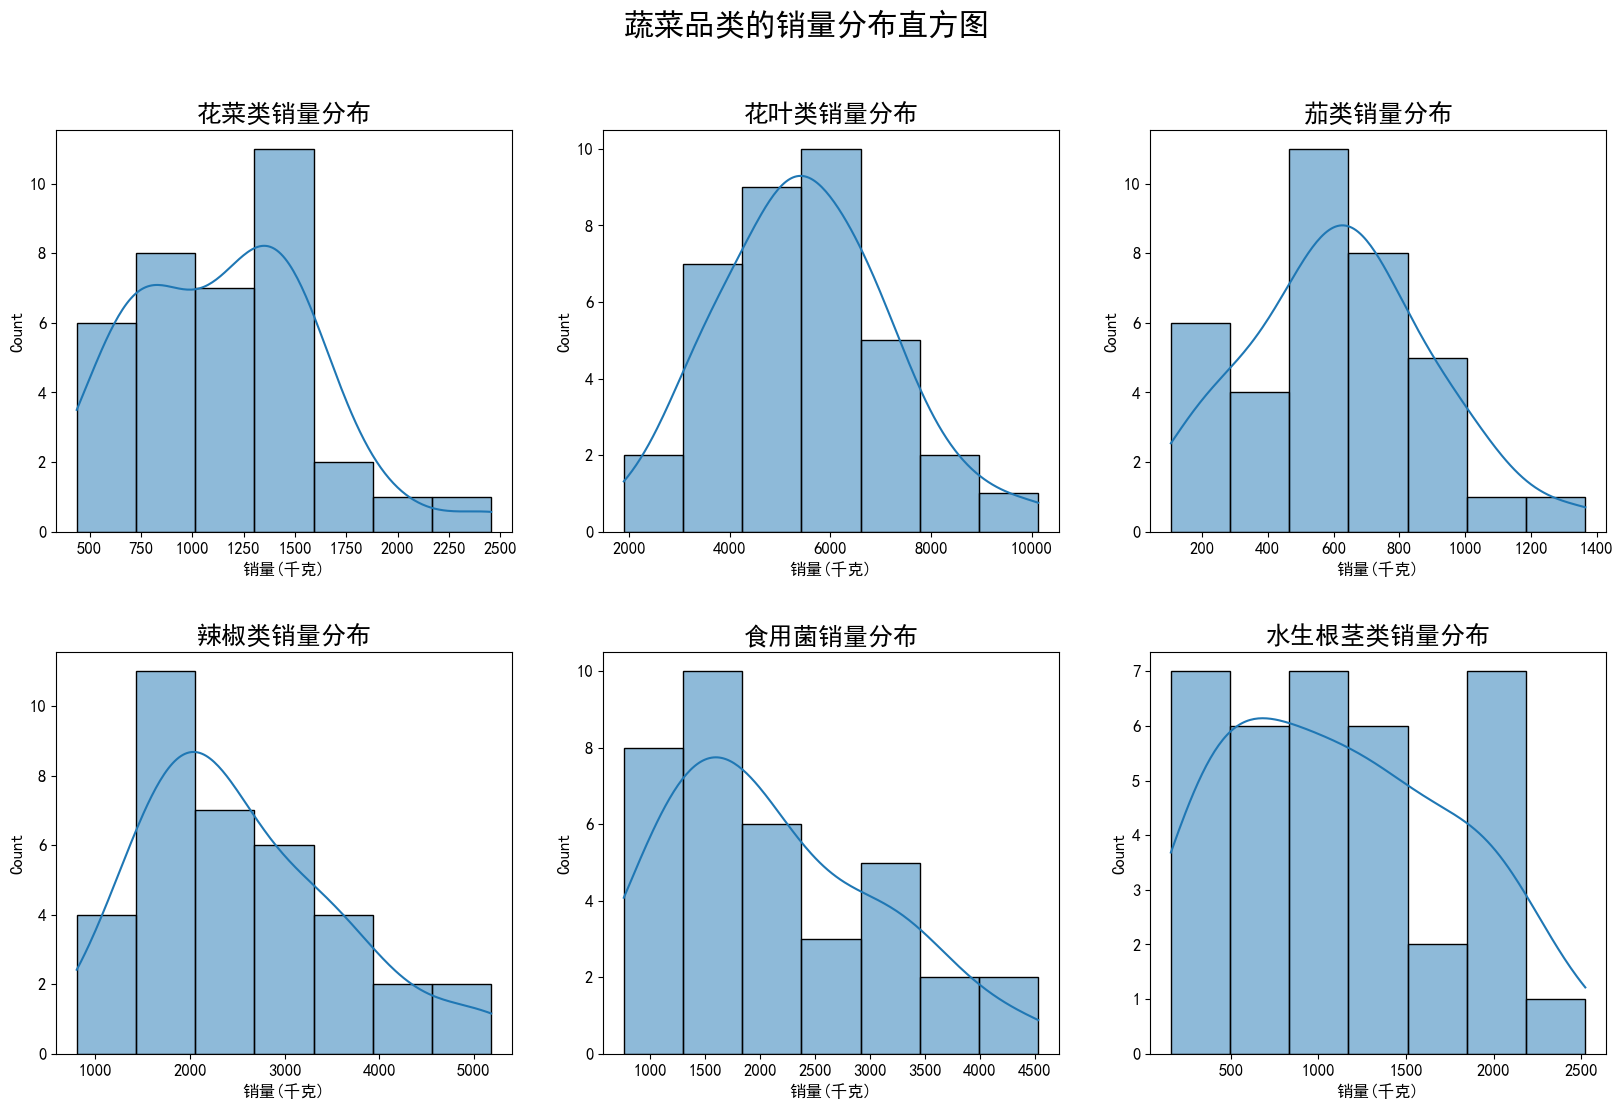

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fig.suptitle('蔬菜品类的销量分布直方图', fontsize=22) 
fig.subplots_adjust(hspace=0.3)             

sns.histplot(data=df1, x="销量(千克)", kde=True, ax=ax[0][0])
ax[0][0].set_title('花菜类销量分布', fontsize=18)

sns.histplot(data=df2, x="销量(千克)", kde=True, ax=ax[0][1])
ax[0][1].set_title('花叶类销量分布', fontsize=18)

sns.histplot(data=df3, x="销量(千克)", kde=True, ax=ax[0][2])
ax[0][2].set_title('茄类销量分布', fontsize=18)

sns.histplot(data=df4, x="销量(千克)", kde=True, ax=ax[1][0])
ax[1][0].set_title('辣椒类销量分布', fontsize=18)

sns.histplot(data=df5, x="销量(千克)", kde=True, ax=ax[1][1])
ax[1][1].set_title('食用菌销量分布', fontsize=18)

sns.histplot(data=df6, x="销量(千克)", kde=True, ax=ax[1][2])
ax[1][2].set_title('水生根茎类销量分布', fontsize=18)

fig.savefig('图片\\1_1_蔬菜品类的销量分布直方图.eps')

# 描述型统计分析

In [56]:
def describe(df):
    # 删除分类特征列
    df = df.select_dtypes(exclude=['object'])

    # 计算统计量
    stats_df = {
        '均值': df.mean(),
        '四分位数1': df.quantile(0.25),
        '中位数': df.median(),
        '四分位数3': df.quantile(0.75),
        '四分位距': df.quantile(0.75) - df.quantile(0.25),
        '众数': df.mode().iloc[0],  
        '标准差': df.std(),
        '方差': df.var(),
        '偏度': df.skew(),
        '峰度': df.kurtosis(),
    }

    # 创建一个新的DataFrame用于存储统计量
    stats_df = pd.DataFrame(stats_df)

    # 转置以便每个统计量一行
    stats_df = stats_df.T

    # 把stats_df粘贴都剪切板
    stats_df.to_clipboard(excel=True)

    return stats_df

# 描述型统计分析：计算统计量
res_1 = describe(df1)
res_2 = describe(df2)
res_3 = describe(df3)
res_4 = describe(df4)
res_5 = describe(df5)
res_6 = describe(df6)

# 具有时间效应的分布分析

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


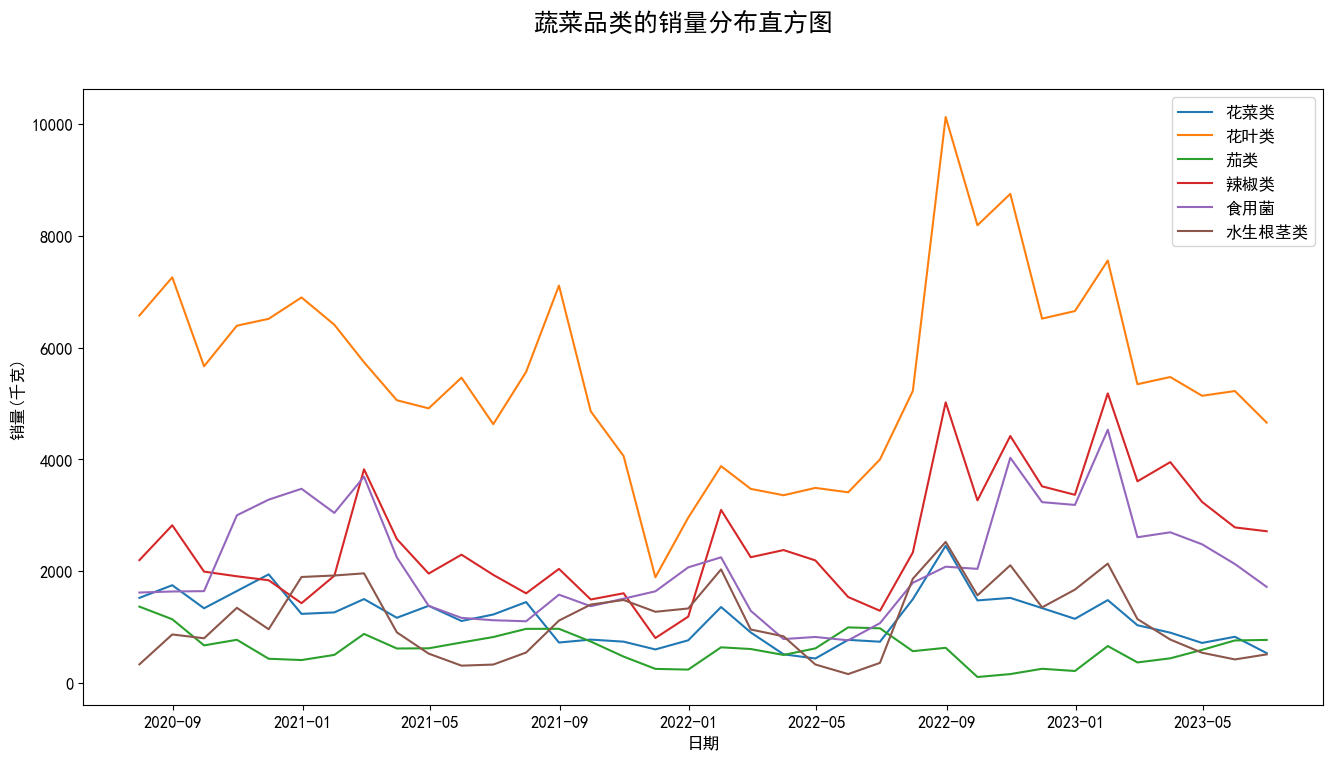

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
fig.suptitle('蔬菜品类的销量分布直方图', fontsize=18) 
fig.subplots_adjust(hspace=0.3)             

ax.plot(df1.index, df1["销量(千克)"], label="花菜类")
ax.plot(df2.index, df2["销量(千克)"], label="花叶类")
ax.plot(df3.index, df3["销量(千克)"], label="茄类")
ax.plot(df4.index, df4["销量(千克)"], label="辣椒类")
ax.plot(df5.index, df5["销量(千克)"], label="食用菌")
ax.plot(df6.index, df6["销量(千克)"], label="水生根茎类")

ax.set_xlabel('日期')
ax.set_ylabel('销量(千克)')
ax.legend()

fig.savefig('图片\\1_1_蔬菜品类销量变化趋势图.eps')

In [58]:
df_ = pd.DataFrame({
    "花菜类": df1["销量(千克)"],
    "花叶类": df2["销量(千克)"],
    "茄类": df3["销量(千克)"],
    "辣椒类": df4["销量(千克)"],
    "食用菌": df5["销量(千克)"],
    "水生根茎类": df6["销量(千克)"]
    })
df_.head()

,花菜类,花叶类,茄类,辣椒类,食用菌,水生根茎类
日期,,,,,,
2020-07-31,1522.555,6577.078,1365.551,2198.049,1617.836,332.056
2020-08-31,1748.658,7261.517,1139.393,2822.344,1636.524,867.180
2020-09-30,1336.066,5668.902,671.692,1992.413,1642.881,798.931
2020-10-31,1644.963,6395.312,771.967,1908.944,3000.532,1344.118
2020-11-30,1943.391,6518.569,432.389,1837.705,3281.028,960.695


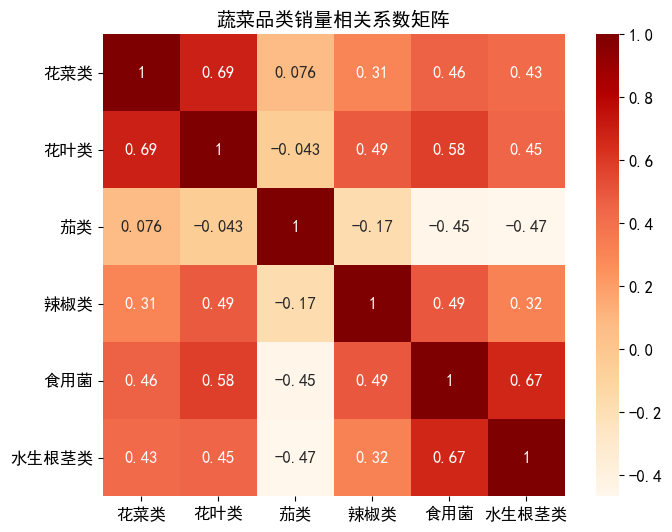

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.heatmap(data=(df_.corr(method="spearman")), 
            square=True, cmap="OrRd", annot=True, ax=ax,
            xticklabels=df_.columns, yticklabels=df_.columns)

ax.set_title('蔬菜品类销量相关系数矩阵', fontsize=14)
plt.yticks(rotation=0)

fig.savefig('图片\\1_1_蔬菜品类销量相关系数矩阵.eps')